# Trabalho ECDB

## Grupo 2


## Alunos: 

- Bruno Sá (Pg48932)
- Gonçalo Cardoso (Pg49034)
- Joana Gonçalves (Pg49835)
- Luís Ferreira (Pg49840)



# CYP P450 2C9 Inhibition_ Information

## Dataset Description: 

The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

## Task Description: 

Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

## Dataset Statistics: 

11,934 drugs.

## References:

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.


Tópicos (apagar depois):

-análise do conjunto de dados e sua breve descrição
- tarefas de pré-processamento dos dados (as que julgar necessárias)
- sumarização dos dados (estatística descritiva, exploração com recurso
a gráficos)
- análise estatística univariada (e.g. análise de “expressão” diferencial)
- análise estatística multivariada (não supervisionada): clustering,
redução de dimensionalidade/ visualização

In [ ]:
#Librarys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, mannwhitneyu

# Importação dos dados e Visualização

In [ ]:
df_cyp2c9 = pd.read_csv("cyp2c9.csv")

In [ ]:
df_features = pd.read_csv("cyp2c9_features.csv")

# 1 - Análise do conjunto de dados e sua breve descrição

### Informações sobre os  dados:

In [90]:
# Ver as dimensões do DataFrame
print("Dimensões: ", df_cyp2c9.shape)

Dimensões:  (11934, 3)


In [91]:
# Ver as primeiras linhas do DataFrame
print(df_cyp2c9.head())

         ids                                             smiles  Y
0  1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21  1
1   644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1
2   644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1
3   644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1
4   645164.0  CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...  0


In [92]:

# Ver os tipos de dados de cada coluna
print(df_cyp2c9.dtypes)

ids       float64
smiles     object
Y           int64
dtype: object


In [93]:
# Ver o número de valores únicos em cada coluna
print(df_cyp2c9.nunique())


ids       11934
smiles    11934
Y             2
dtype: int64


In [94]:

# Ver a quantidade de valores ausentes em cada coluna
print(df_cyp2c9.isnull().sum())


ids       0
smiles    0
Y         0
dtype: int64


- O DataFrame "df_cyp2c9" fornecido possui 3 colunas: "ids", "smiles" e "Y". A coluna "ids" representa o identificador único de cada amostra, a coluna "smiles" representa a representação química em formato SMILES e a coluna "Y" representa uma variável alvo binária, onde 1 indica inibição da enzima CYP2C9 e 0 indica não-inibição.

- Vimos também que não há valores omissos nem valores duplicados pelo que este tipo de pré-processamento pode ser ultrapassado.

### Informações sobre os  dados:

In [95]:
# Ver as dimensões do DataFrame
print("Dimensões: ", df_features.shape)

Dimensões:  (11934, 208)


In [96]:
# Ver as primeiras linhas do DataFrame
print(df_features.head())

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.820479       -0.183140          12.820479           0.128619   
1        6.126257        0.660427           6.126257           0.660427   
2        5.719940       -0.219974           5.719940           0.075509   
3       12.040634       -0.208718          12.040634           0.006714   
4       13.082813       -0.044883          13.082813           0.018472   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.457873  362.476         344.332   362.07590                126.0   
1  0.756902  255.708         245.628   255.05632                 88.0   
2  0.605920  421.549         390.301   421.25900                164.0   
3  0.728361  324.344         308.216   324.13348                122.0   
4  0.457249  495.628         458.332   495.29578                194.0   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  0.0  ...         1.0  

In [97]:
# Ver os tipos de dados de cada coluna
print(df_features.dtypes)


MaxEStateIndex       float64
MinEStateIndex       float64
MaxAbsEStateIndex    float64
MinAbsEStateIndex    float64
qed                  float64
                      ...   
fr_thiazole          float64
fr_thiocyan          float64
fr_thiophene         float64
fr_unbrch_alkane     float64
fr_urea              float64
Length: 208, dtype: object


In [98]:
# Ver o número de valores únicos em cada coluna
print(df_features.nunique())

MaxEStateIndex       11574
MinEStateIndex       11439
MaxAbsEStateIndex    11574
MinAbsEStateIndex    11304
qed                  10876
                     ...  
fr_thiazole              4
fr_thiocyan              2
fr_thiophene             3
fr_unbrch_alkane        20
fr_urea                  5
Length: 208, dtype: int64


In [99]:
# Ver a quantidade de valores ausentes em cada coluna
print(df_features.isnull().sum())

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


## Descrição das Features 

Nas colunas do dataframe features estão representadas algumas propriedades dos compostos químicos que são avaliadas neste tipo de estudo, onde se pretende demonstrar se um composto tem capacidade de inibição de um certo gene.

As propriedades são:

- MaxEStateIndex:  Um valor positivo do índice ESTate indica uma capacidade de retirada de eletrões, enquanto um valor negativo indica uma capacidade de doação de eletrões.

- MinEStateIndex 

- MaxAbsEStateIndex :  Pode ser usado para identificar o átomo mais doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- MinAbsEStateIndex : Pode ser usado para identificar o átomo menos doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- qed :  Estima de forma quantitativa a drug-likeness. Varia de 0 a 1, com pontuações mais altas indicando uma maior probabilidade de o composto ser oralmente biodisponível e ter propriedades farmacológicas desejáveis.

- MolWt : MolWt é um descritor que representa o peso molecular de um composto. or exemplo, compostos com pesos moleculares muito altos podem ter dificuldade em atravessar as membranas celulares ou podem ser muito grandes para se ligar a uma proteína alvo, enquanto compostos com pesos moleculares muito baixos podem ser muito voláteis ou facilmente metabolizados.

- HeavyAtomMolWt : HeavyAtomMolWt é um descritor que representa o peso molecular de um composto com base apenas nos átomos que não são hidrogénios.

- ExactMolWt : ExactMolWt é um descritor que representa o peso molecular exato de um composto, tendo em consideração a abundância natural dos isótopos de cada elemento na molécula

- NumValenceElectrons : Número de elétrões de valencia


# 2 - Pré - processamento



- Algumas tarefas de pré-processamento que podem ser necessárias incluem:

- Remoção de valores duplicados
- Tratamento de valores ausentes
- Conversão de tipos de dados
- Normalização de dados
- Remoção de colunas irrelevantes

##### - Neste caso, não há necessidade de realizar nenhum pré-processamento nos dados, visto que não há valores omissos nem duplicados. No entanto, para a análise estatística univariada e multivariada, é necessário separar os dados em grupos, um para os compostos que inibem a enzima CYP2C9 e outro para os que não inibem.

###  2.1 - Criação e Divisão em dataframes dos compostos que inibiam e não inibiam o CYP2C9

In [ ]:
df1 = df_cyp2c9[df_cyp2c9['Y'] == 1]
df0 = df_cyp2c9[df_cyp2c9["Y"] == 0]

### 2.2 - Concatenação dos dataframes

In [101]:
df = pd.concat([df_cyp2c9, df_features], axis=1)


0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11929    0.0
11930    0.0
11931    0.0
11932    0.0
11933    0.0
Name: fr_unbrch_alkane, Length: 11934, dtype: float64

# 3 - Sumarização dos dados


### Estatística Descritiva

In [ ]:
df_cyp2c9.describe()

,ids,Y
count,1.193400e+04,11934.000000
mean,6.262327e+06,0.337272
std,1.803992e+07,0.472798
min,1.080000e+02,0.000000
25%,1.433849e+06,0.000000
50%,3.234186e+06,0.000000
75%,4.251174e+06,1.000000
max,1.460310e+08,1.000000


In [ ]:
df_features.describe()



,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,...,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,11.274808,-0.879382,11.274808,0.192623,0.611521,355.016700,334.581007,354.626917,131.051114,0.0,...,0.101894,0.073571,0.011061,0.004190,0.009804,0.032261,0.000168,0.062929,0.127786,0.044076
std,2.689638,1.442954,2.689638,0.224866,0.191307,108.988404,103.017461,108.873587,40.828041,0.0,...,0.325473,0.271160,0.104592,0.064595,0.101878,0.189071,0.012945,0.250991,0.774506,0.213281
min,2.269884,-7.603764,2.269884,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.896393,-1.063285,10.896393,0.043124,0.481696,289.292000,272.175000,289.024430,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.242406,-0.402087,12.242406,0.116725,0.632182,347.435000,327.159000,347.133635,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.924319,-0.062750,12.924319,0.237865,0.772312,409.507250,386.231750,409.140095,152.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,4.000000


Sumário das features: 


## Apoio gráfico á Sumarização

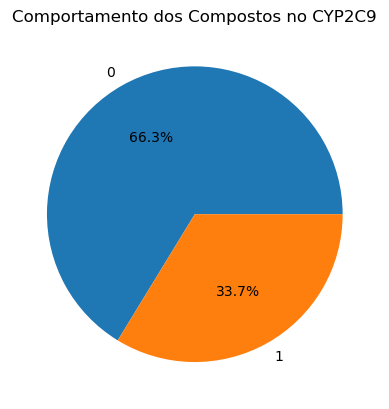

In [ ]:

counts = df_cyp2c9['Y'].value_counts()

plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')


plt.title('Comportamento dos Compostos no CYP2C9')


plt.show()

- Pelo gráfico conseguimos perceber que há mais compostos que não inibem o cyp2c9 (66.3%) do que os que inibem (33.7%)

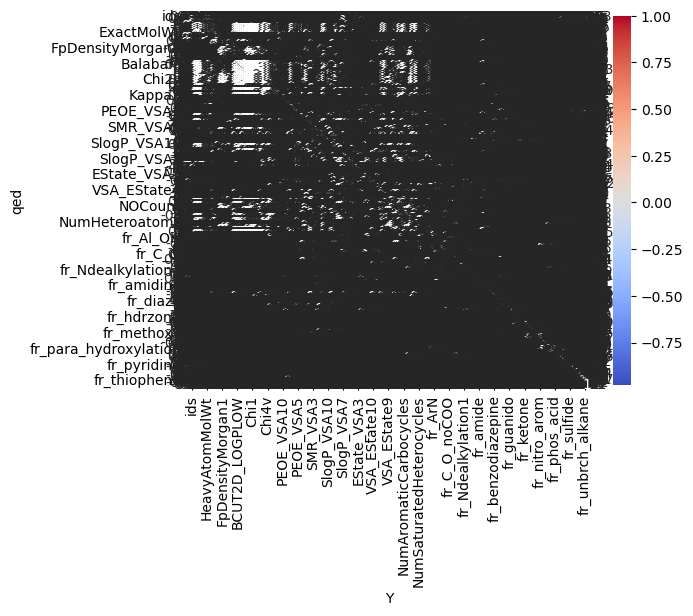

In [104]:
# Histograma da coluna "Y"
sns.histplot(df, x="Y")

# Gráfico de barras da contagem de valores na coluna "Y"
sns.countplot(data=df, x="Y")

# Matriz de correlação entre as variáveis
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Gráfico de dispersão entre duas variáveis
sns.scatterplot(data=df, x="Y", y="qed")

plt.show()

# 4 - Análise estatística Univariada

# Alguns Testes Estatísticos

In [103]:
med_inhib = df[df["Y"] == 1]["qed"]
med_not_inhib = df[df["Y"] == 0]["qed"]
t_stat, p_val_t = ttest_ind(med_inhib, med_not_inhib)
mwu_stat, p_val_mwu = mannwhitneyu(med_inhib, med_not_inhib)
print("t-test: t-value = {:.3f}, p-value = {:.3f}".format(t_stat, p_val_t))
print("Mann-Whitney: U-value = {:.3f}, p-value = {:.3f}".format(mwu_stat, p_val_mwu))


t-test: t-value = -16.600, p-value = 0.000
Mann-Whitney: U-value = 12682355.000, p-value = 0.000


# 5 - Análise estatística multivariada (não supervisionada): clustering, redução de dimensionalidade/ visualização

ValueError: invalid literal for int() with base 10: 'C'